## Week2. Optimization Problems & Rydberg Atom Arrays - Task 3

------

We demonstrate the Gotham City cell phone tower problem into UD-MIS form.


**P1. Explain why this is a problem that can be easily mapped to the UD-MIS problem.**

If we consider each of candidates for the normalized cell phone tower location as the vertices of a graph,
we can draw edges connecting vertices if the singal range of the corresponding cell tower is overllaped.
Then solving MIS problem on this graph is corresponding to the Bruce Wayne's problem.
Because,

1. The constraint that signal ranges do not overlap means the vertices of the graph are not connected.

$ n_i =n_j = 1 \Rightarrow (i, j) \notin E $

2. The objective that maximizes the signal range is equal to maximizing the number of chosen vertices.

$ \max_{S \in B} |S| $

**P2 Solve Gotham City's problem.**

We used QA to solve this problem, got multiple solutions. The steps and results are demonstrated in the below.

**P3 Should Bruce pay for a few more cell phone towers to make sure that more of Gotham City has cell phone service?**

Yes/No. It depends on how much money to be paid per additional tower, and the revenue for each location.
He should bulid towers unless the marginal cost exceeds the additional revenues.


------

From now, the solution for P2 is shown.

Starting from the imports:

In [1]:
import pickle

import matplotlib.pyplot as plt

from collections import Counter

from Week2_Rydberg_Atoms.utils import int_to_bin, sanity_check, int_to_bin_str
from julia_run_quantum_annealing import run_annealing, measure, get_edges
from draw_graph import draw_graph, draw_multi_graph

/home/gwonhaklee/workspace/CohortProject_2021/venv/lib/python3.8/site-packages/julia/core.py:687: FutureWarning: Accessing `Julia().<name>` to obtain Julia objects is deprecated.  Use `from julia import Main; Main.<name>` or `jl = Julia(); jl.eval('<name>')`.
  warnings.warn(


Setting the graph and other parameters,

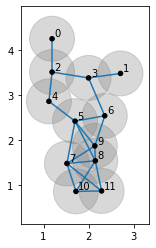

In [12]:
graph = [
    (1.19, 4.25),
    (2.71, 3.48),
    (1.19, 3.51),
    (2.00, 3.38),
    (1.12, 2.86),
    (1.70, 2.42),
    (2.36, 2.54),
    (1.52, 1.48),
    (2.15, 1.54),
    (2.14, 1.87),
    (1.72, 0.86),
    (2.29, 0.87),
]
edges = get_edges(graph)
dt = 0.001
num_vertices = len(graph)
draw_graph(graph, radius=0.5)

Run the quantum annealing solution, to get the quantum state.

In [4]:
psi = run_annealing(graph, edges, dt)

Set the number of shots and enumerate the occurrences for each bitstring observation.

In [5]:
nshots = 10000
samples = [s for s in measure(psi, nshots=nshots)]
occurrence = Counter(samples)
max_occ = sorted([k for k in occurrence], key=lambda k: occurrence[k], reverse=True)
for k in max_occ:
    print(f"{int_to_bin_str(k, num_vertices)} : {occurrence[k]}")

100001010011 : 1765
010001010011 : 1748
011000010011 : 1259
101000010011 : 1222
000011010011 : 972
000101010011 : 959
101000011001 : 329
011000011001 : 288
000001010011 : 119
101001010011 : 109
011001010011 : 91
110001010011 : 70
000010011001 : 53
111000010011 : 53
000100011001 : 51
101000011011 : 47
011000011011 : 42
010011010011 : 41
010101010011 : 39
100011010011 : 38
000111010011 : 36
000101000110 : 34
001000010011 : 30
101000010010 : 28
100000101001 : 26
011000010010 : 24
100001000110 : 23
111000011001 : 22
010001000110 : 22
000011000110 : 21
100000011001 : 20
010000011001 : 19
100101010011 : 19
001000011001 : 18
100001000011 : 18
010000101001 : 17
010001000011 : 15
101000011000 : 15
101000000011 : 14
101000010001 : 14
101000001001 : 14
011000000110 : 13
100001010001 : 13
011000000011 : 12
011000001001 : 12
101000000110 : 11
010000100011 : 11
011000010001 : 8
111000010010 : 7
100000010011 : 7
100000100110 : 7
010000100110 : 7
010000010011 : 6
000100010011 : 5
000110011001 : 5
1000

We plotted the highlighted graphs for 14 most frequent bitstrings.

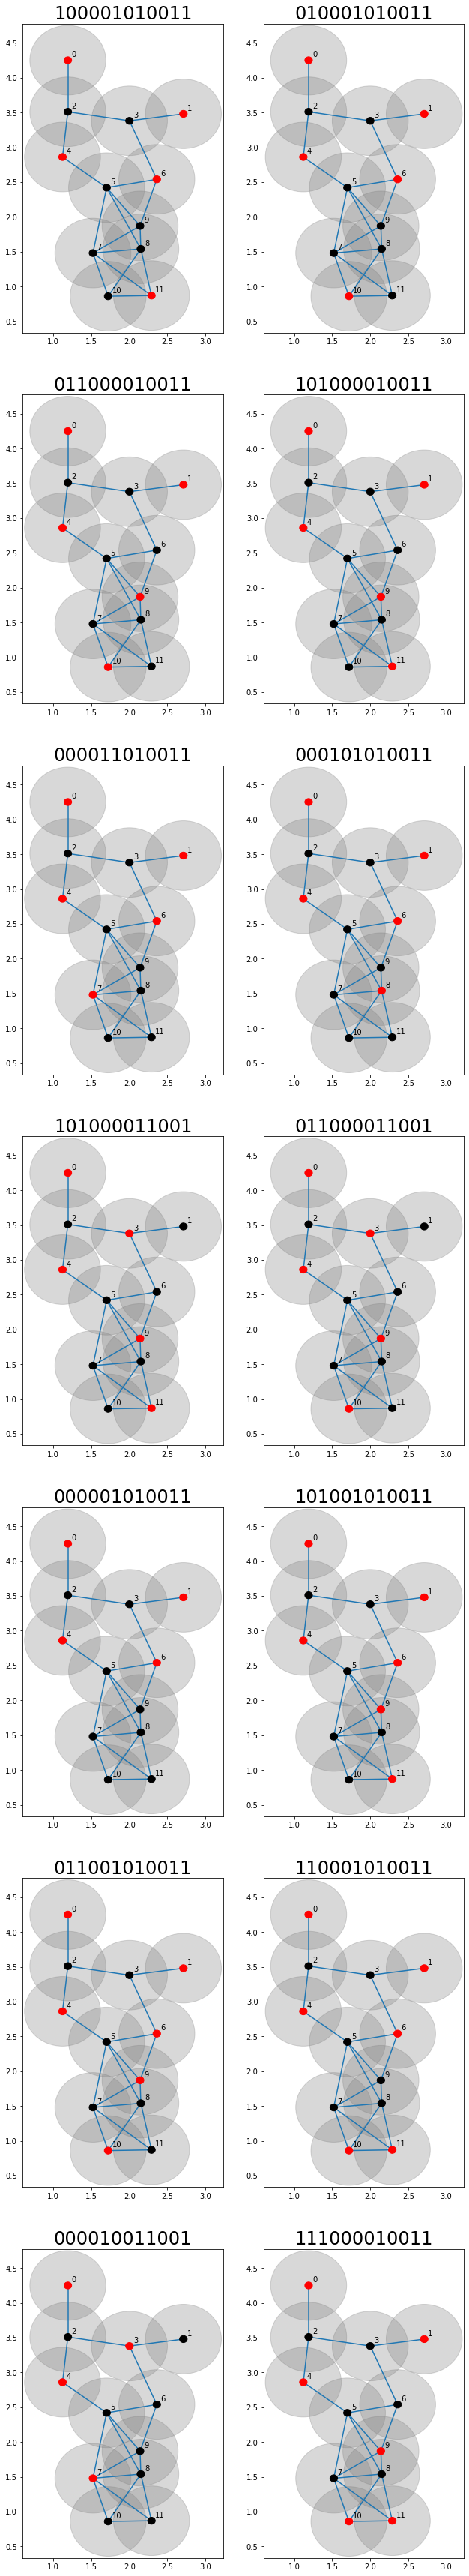

In [13]:
num_draw = 14
frequent_answers = [int_to_bin(x, len(graph)) for x in max_occ[:num_draw]]
draw_multi_graph(graph,
                 radius=0.5,
                 answer_list=frequent_answers,
                 titles=[int_to_bin_str(x, len(graph)) for x in max_occ[:num_draw]])

The first 8 plots has no violations and maximal(5) vertices. While the other has fewer vertices or violations.
So we find 8 solutions redrawn as below.

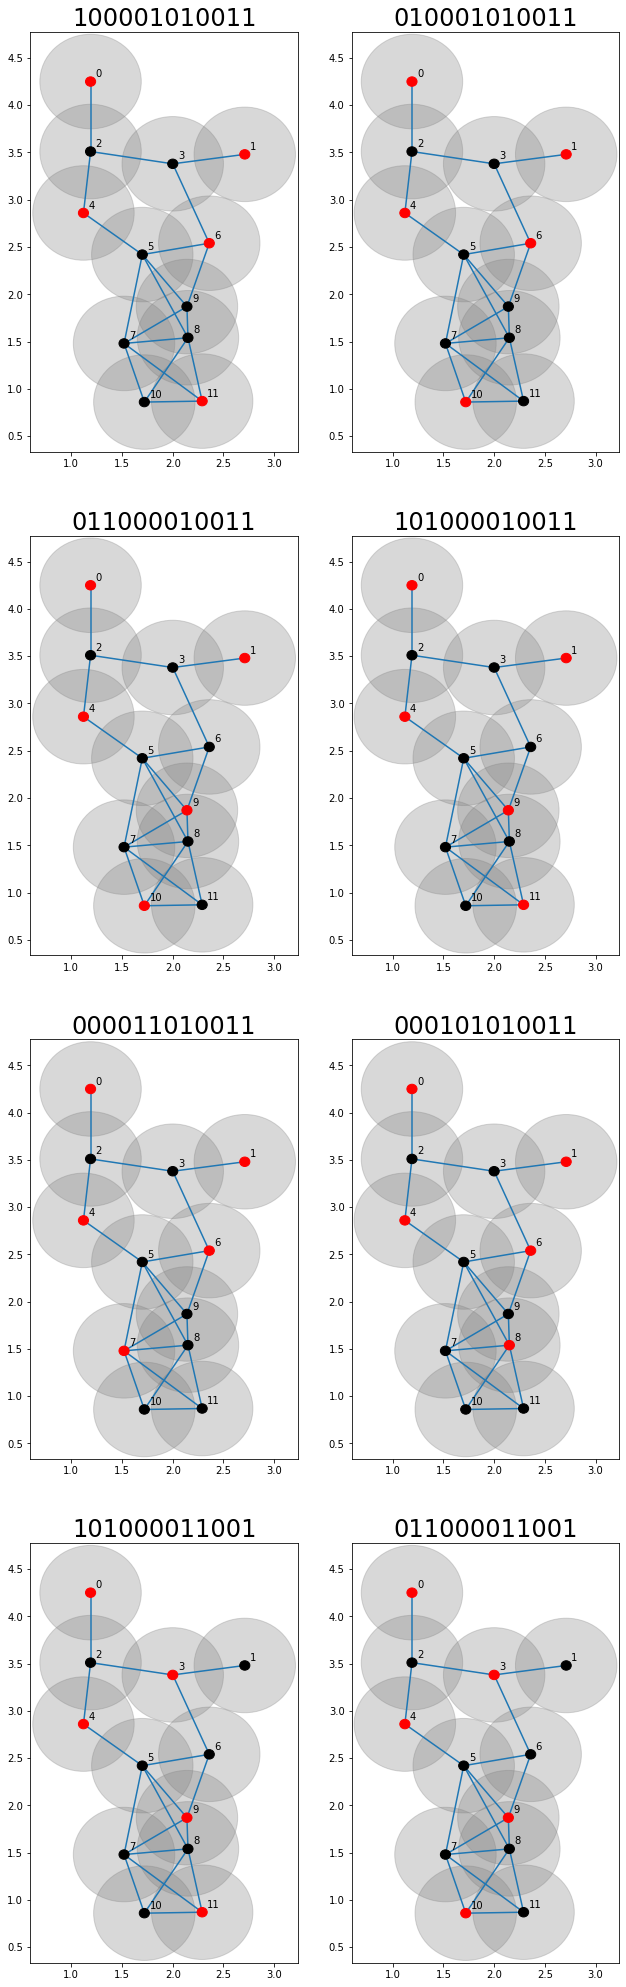

In [14]:
draw_multi_graph(graph,
                 radius=0.5,
                 answer_list=frequent_answers[:8],
                 titles=[int_to_bin_str(x, len(graph)) for x in max_occ[:8]])

For all observations, we calculated the probabilities to find the optimal, invalid and suboptimal answers.

In [16]:
max_num_v = 5
not_valid_ans = list()
not_max_ans = list()
correct_ans = list()
for a in max_occ:
    v, num_v =sanity_check(graph, answer=int_to_bin(a, num_vertices), radius=0.5)
    if v > 0:
        not_valid_ans.append(a)
    elif num_v != max_num_v:
        not_max_ans.append(a)
    else:
        correct_ans.append(a)
pr_not_valid = sum([occurrence[k] for k in not_valid_ans])/nshots
pr_not_max = sum([occurrence[k] for k in not_max_ans])/nshots
pr_correct = sum([occurrence[k] for k in correct_ans])/nshots
print(f"probability to find obtimal answers    : {pr_correct}")
print(f"probability to find invalid answers    : {pr_not_valid}")
print(f"probability to find suboptimal answers : {pr_not_max}")

probability to find obtimal answers    : 0.8542
probability to find invalid answers    : 0.0689
probability to find suboptimal answers : 0.0769


## Further research 1.

We find the probabilities to find optimal answers, for different `dt`, which determines the discretization of
the continuous change of hamiltonian. As `dt` increases, the discretization becomes coarse, expected to result in false
annealing.

We simulated the QA algorithm with different `dt` in advance, of which results are stored in `./simlulations/task3_verbose.txt`
as `pickle`.

In [17]:
pkl_file = "./simulations/task3_verbose.txt"
with open(pkl_file, 'rb') as of:
    data = pickle.load(of)
dt_list = [dt for dt in data]
pr_list = list()
for dt in data:
    occurrence_dt = data[dt]
    n_shots_dt = sum([occurrence_dt[k] for k in occurrence_dt])
    pr_correct_dt = 0
    for k in occurrence_dt:
        v, num_v = sanity_check(graph, answer=int_to_bin(k, num_vertices), radius=0.5)
        if v == 0 and num_v == max_num_v:
            pr_correct_dt += occurrence_dt[k]
    pr_correct_dt /= n_shots_dt
    pr_list.append(pr_correct_dt)
print(dt_list)
print(pr_list)

[0.1, 0.025, 0.01, 0.0025, 0.001, 0.00025, 0.0001]
[0.0718, 0.6222, 0.8385, 0.8614, 0.8518, 0.844, 0.8513]


Plotting the result, we checked that the coarse discretization results in less probability to find answer.

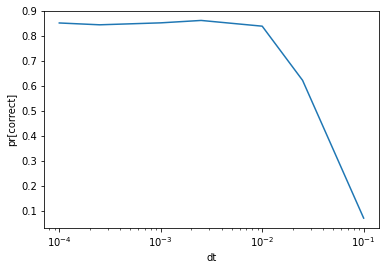

In [18]:
plt.plot(dt_list, pr_list)
plt.xlabel("dt")
plt.ylabel("pr[correct]")
plt.xscale('log')

## Further research 2.

We also find the probabilities to find optimal answers, for different `T`, describing the total time of annealing.
If `T` becomes longer, the hamiltonian changes slower.

We put `dt=T/1000`, which was enough to give the maximal probability to find the answer, costing not too much computation resources.


In [21]:
pkl_file = "./simulations/task3_verbose_2.txt"
with open(pkl_file, 'rb') as of:
    data = pickle.load(of)
T_list = [T for T in data]
pr_list = list()
for T in data:
    occurrence_T = data[T]
    n_shots_T = sum([occurrence_T[k] for k in occurrence_T])
    pr_correct_T = 0
    for k in occurrence_T:
        v, num_v = sanity_check(graph, answer=int_to_bin(k, num_vertices), radius=0.5)
        if v == 0 and num_v == max_num_v:
            pr_correct_T += occurrence_T[k]
    pr_correct_T /= n_shots_T
    pr_list.append(pr_correct_T)
print(T_list)
print(pr_list)

[0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]
[0.001, 0.0046, 0.0846, 0.5821, 0.8601, 0.995, 0.9976]


Plotting the result, we found out the slower annealing process gives more credible solution.

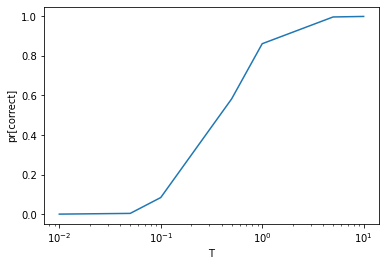

In [22]:
plt.plot(dt_list, pr_list)
plt.xlabel("T")
plt.ylabel("pr[correct]")
plt.xscale('log')
